In [1]:
import pandas as pd
import pylab as pl
import re
import xlsxwriter

In [2]:
df = pd.read_csv("./test.csv", sep='\t')


In [3]:
df.groupby(["label","label_id"]).describe()

Unnamed: 0                                               \
                          count        mean         std   min     25%    50%   
label       label_id                                                           
اجتماعی     0             217.0  794.829493  446.137076  23.0  439.00  750.0   
اقتصادی     1             156.0  801.282051  473.815628   3.0  410.50  757.0   
بین الملل   2             197.0  841.116751  461.383425   1.0  450.00  878.0   
سیاسی       3             227.0  806.255507  507.115028  13.0  338.00  785.0   
علمی فناوری 4             244.0  856.053279  459.343297  15.0  458.75  865.5   
فرهنگی هنری 5             256.0  829.179688  466.569717   0.0  462.50  862.5   
ورزشی       6             138.0  839.217391  507.374518   2.0  407.25  907.0   
پزشکی       7             209.0  800.904306  489.341542   7.0  336.00  849.0   

                                       
                          75%     max  
label       label_id                   
اجتماعی     0         1189.00  1642.0  
اقتصادی     1         1247.25  1637.0  
بین الملل   2         1199.00  1640.0  
سیاسی       3         1234.50  1643.0  
علمی فناوری 4         1246.25  1639.0  
فرهنگی هنری 5         1211.75  1630.0  
ورزشی       6         1287.25  1641.0  
پزشکی       7         1228.00  1635.0

In [3]:
def word_count(str):
    return len(str.split())


In [4]:
def char_count(str):
    return len(str)


In [5]:
def sentence_count(str):
    return len(str.split('.'))


In [6]:
def number_count(str):
    return len(re.findall('[۰-۹0-9]+', str))


In [7]:
def en_word_count(str):
    return len(re.findall('[a-zA-Z]+', str))


In [8]:
lbl = df.label_id.to_list()
lbl = list(set(lbl))

In [9]:
label = []
char_len = []
word = []
sentence = []
number = []
en = []
for lb in lbl:
    data = df[df['label_id'] == lb]
    for index, row in data.iterrows():
        str = row["content"]
        label.append(lb)
        char_len.append(char_count(str))
        word.append(word_count(str))
        sentence.append(sentence_count(str))
        number.append(number_count(str))
        en.append(en_word_count(str))
        # print(f"label : {lb},len : {char_count(str)}, word : {word_count(str)}, sentence : {sentence_count(str)}, number : {number_count(str)}, en : {en_word_count(str)}")

report = pd.DataFrame({
    "label": label,
    "char_len": char_len,
    "word": word,
    "sentence": sentence,
    "number": number,
    "en": en
})
report

,label,char_len,word,sentence,number,en
0,0,1159,223,11,11,0
1,0,1522,307,7,1,0
2,0,1465,286,6,0,0
3,0,2930,587,13,11,0
4,0,993,192,6,16,0
...,...,...,...,...,...,...
1639,7,1725,329,8,7,1
1640,7,1114,207,6,1,0
1641,7,3022,585,13,1,5
1642,7,1784,334,12,10,0


In [10]:
# k = report[report["label"] == 3]
# print(len(k))
# e = k.groupby(["sentence"]).size()
# print(e)
# e.plot(kind='bar',figsize=(20,10))

In [11]:
# report2 = report[report["label"]==0]
# e = report2["number"].value_counts()
# print(e)
# print(len(e))
# e.plot(kind='bar',figsize=(200,10))

In [12]:
# report.groupby(["label"])["word"].value_counts()

In [13]:
# report.hist(column="word",by="label",figsize=(20,20))

In [14]:
def max(df,head):
    return df.groupby(["label"])[head].max().to_list()

def min(df,head):
    return df.groupby(["label"])[head].min().to_list()

def mean(df,head):
    return df.groupby(["label"])[head].mean().to_list()

def median(df,head):
    return df.groupby(["label"])[head].median().to_list()

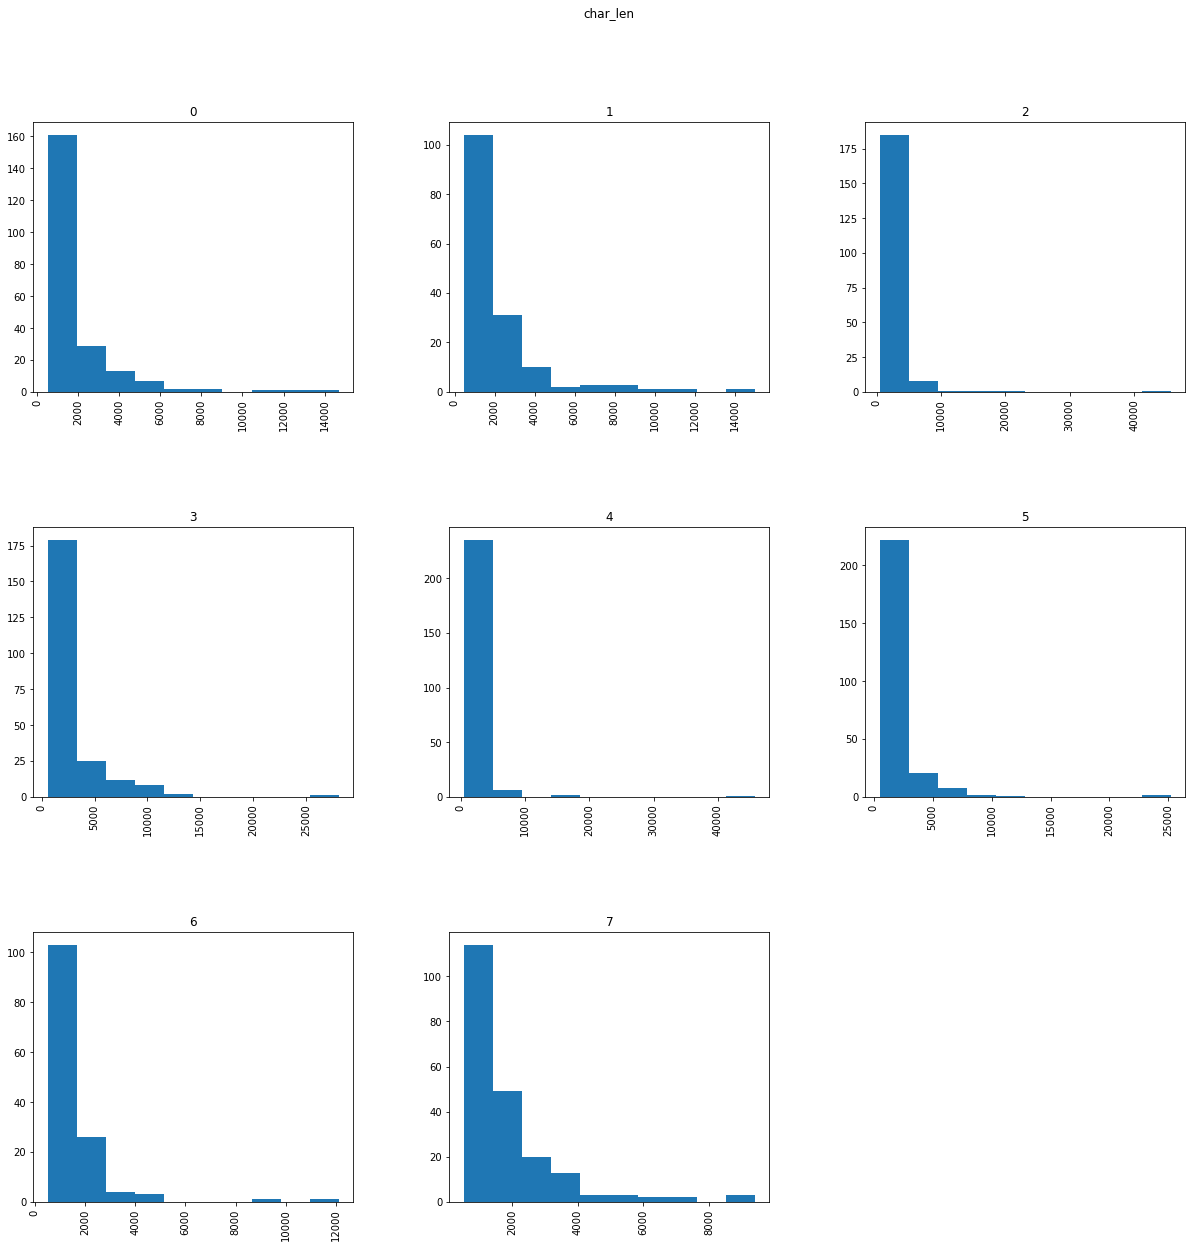

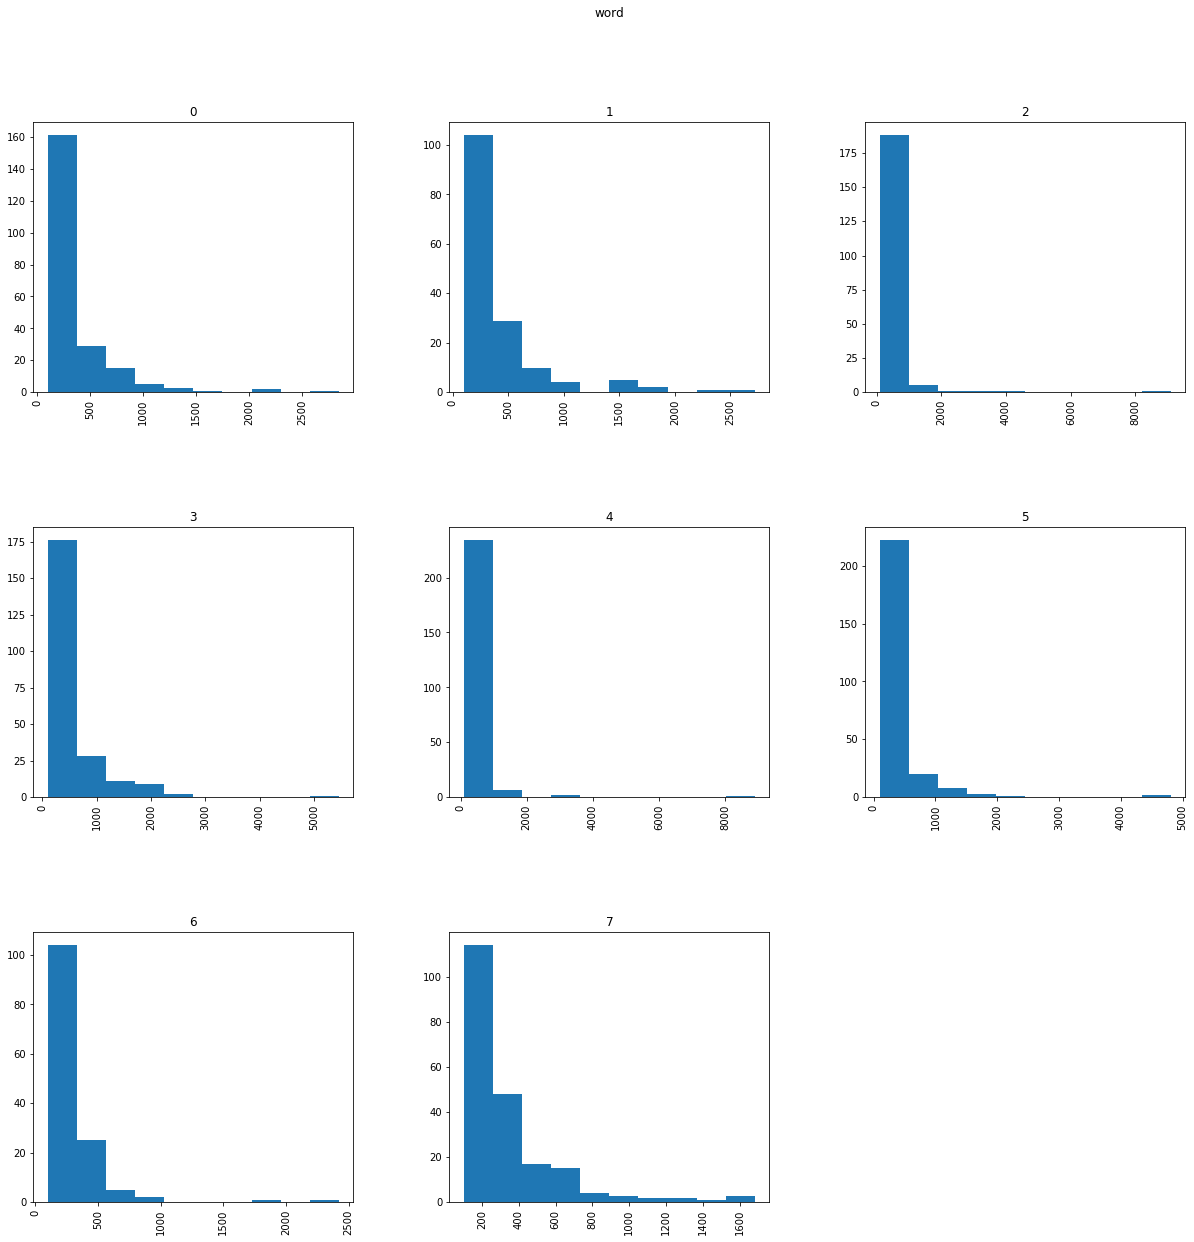

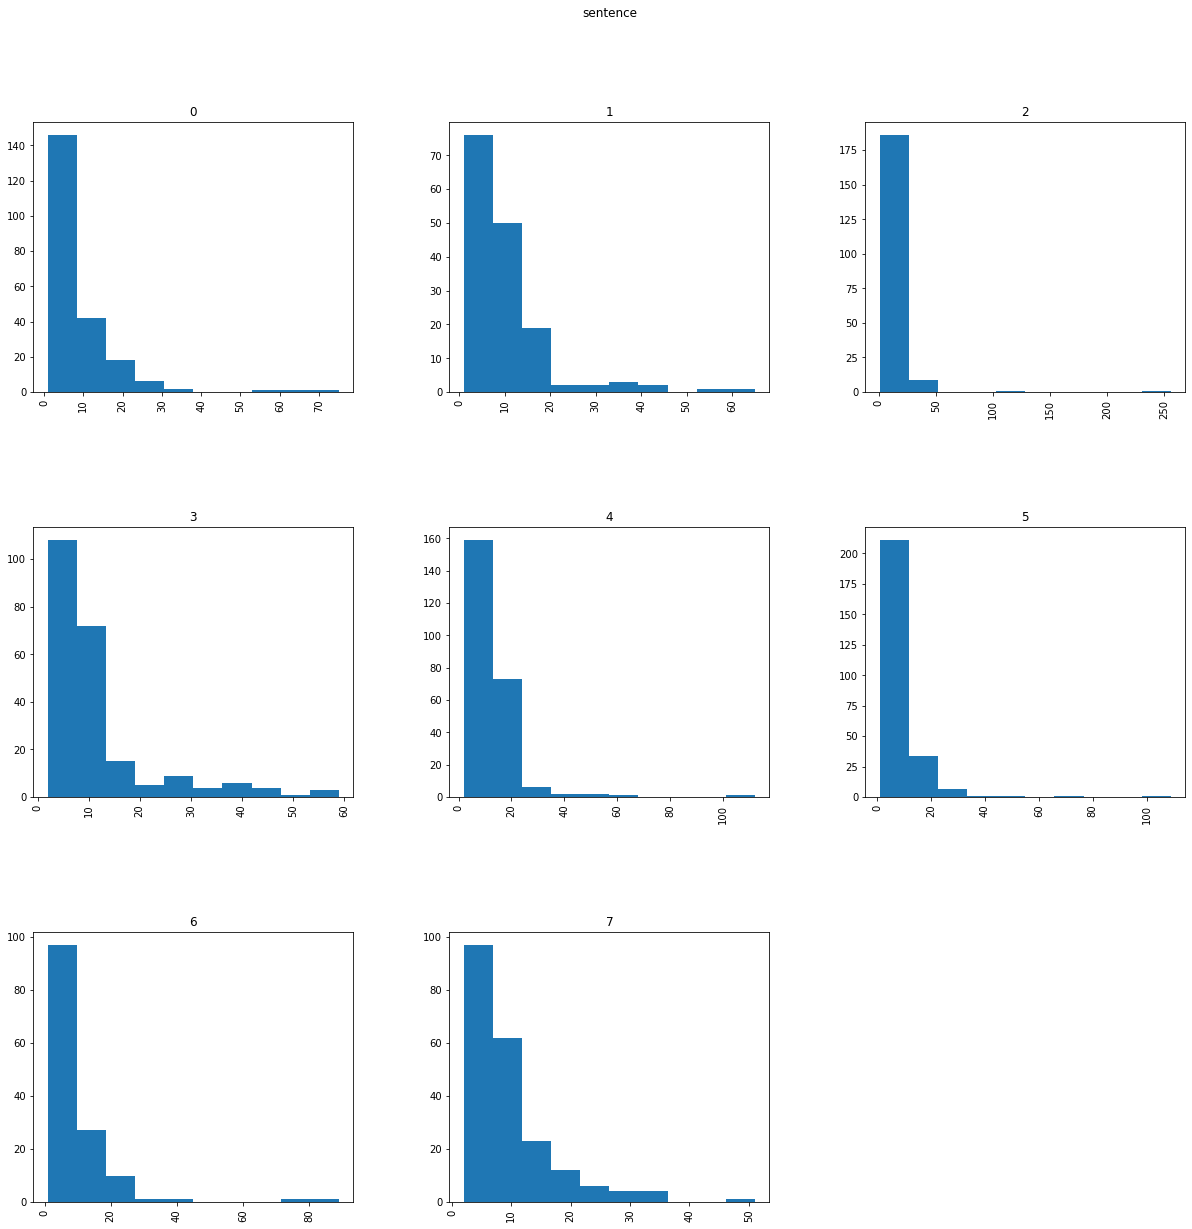

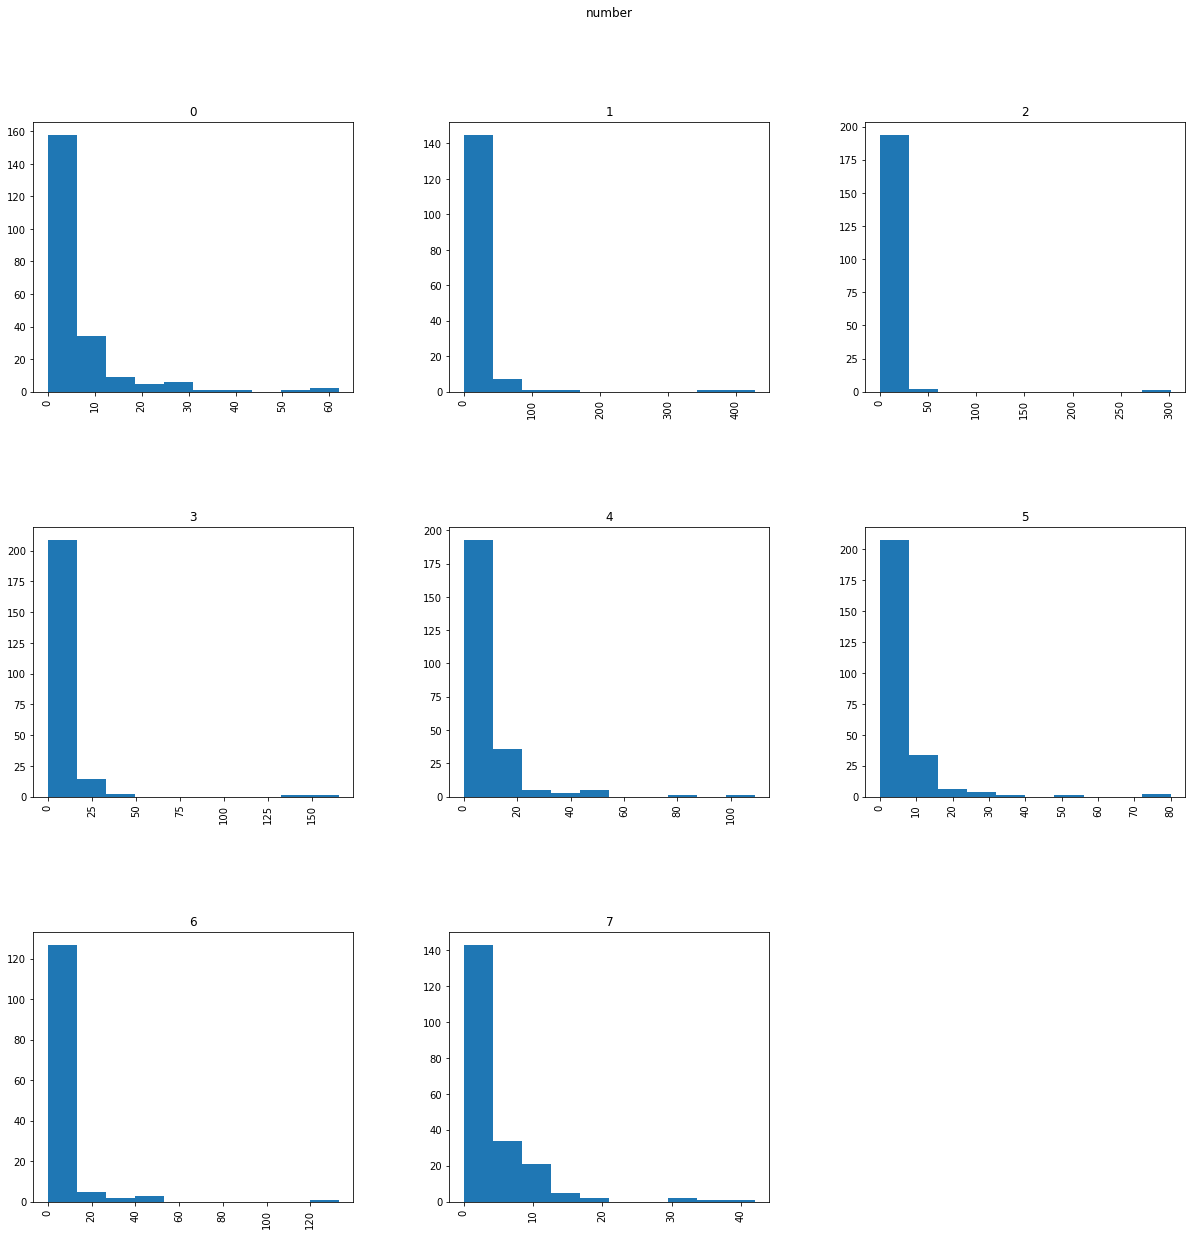

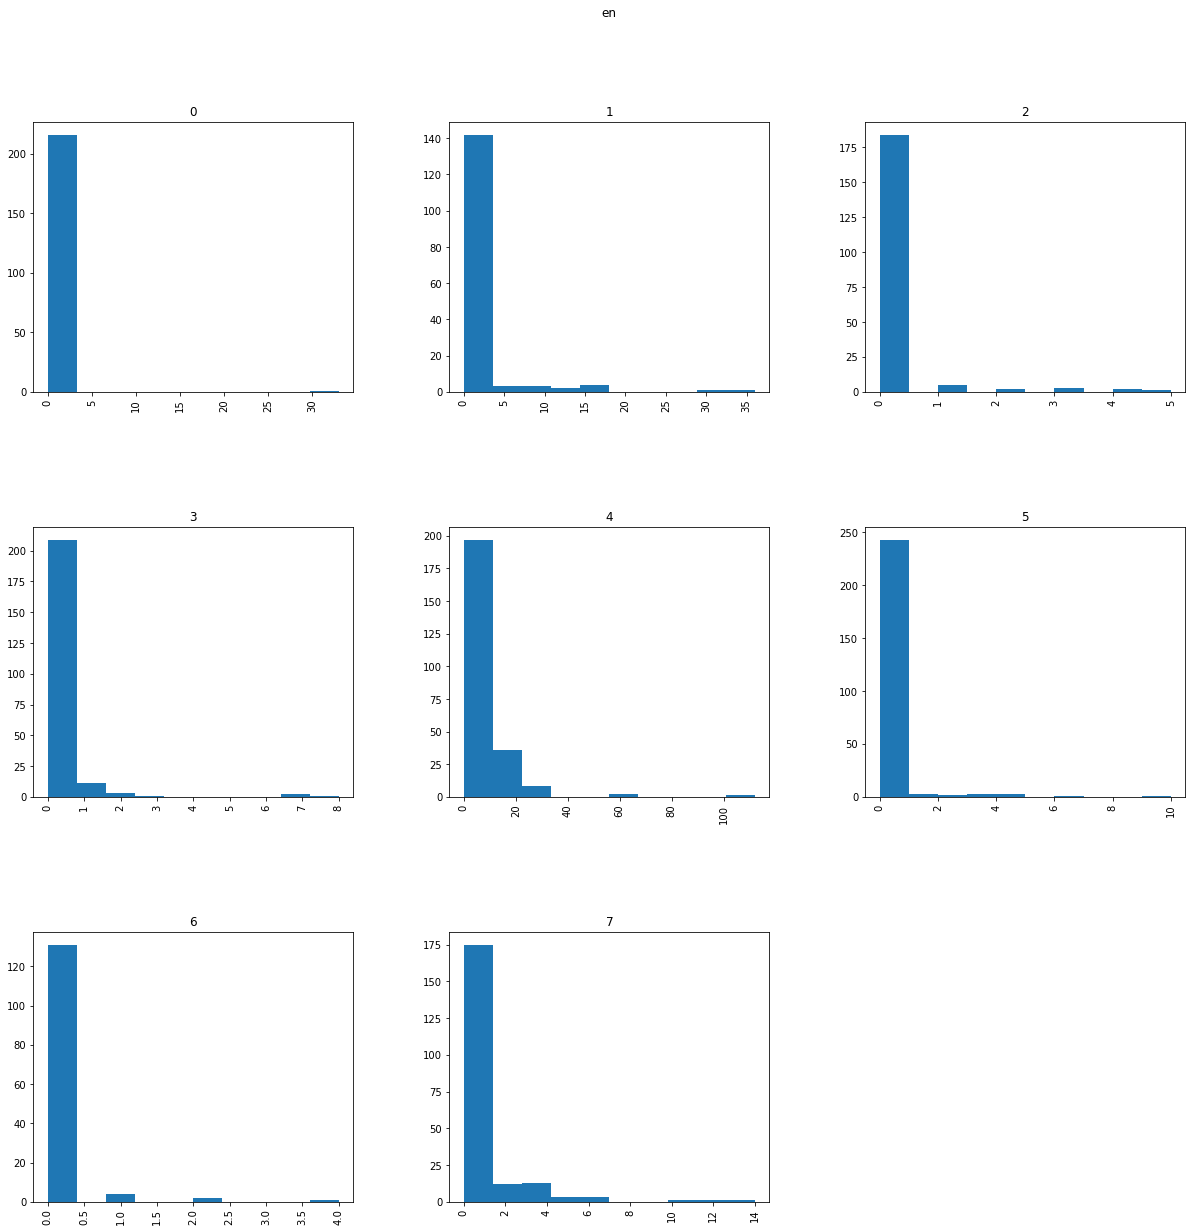

In [15]:
workbook = xlsxwriter.Workbook("./info.xlsx")
worksheet = workbook.add_worksheet()

heads = [head for head in report if head != "label" ]
params_title = ["max","min","mean","median"]
params = {
    "max" : max,
    "min" : min,
    "mean" : mean,
    "median" : median
}


merge_format = workbook.add_format({
    'font_size' : 14,
    'font_color' : '#212121',
    'bold': 1,
    'align': 'center',
    'valign': 'vcenter',
    })
head_format = workbook.add_format({
    'font_size' : 10,
    'font_color' : '#212121',
    'bold': 1,
    'align': 'center',
    'valign': 'vcenter',
    })
data_format = workbook.add_format({
    'font_size' : 10,
    'font_color' : '#212121',
    'bold': 0,
    'align': 'center',
    'valign': 'vcenter',
    })

worksheet.write_column(2,0,lbl,data_format)
col = 1
for head in heads:
    row = 0
    worksheet.merge_range(row,col,row,col+len(params_title)-1, head,merge_format)
    
    for i in range(len(params_title)):
        worksheet.write(row+1,col,params_title[i],head_format)
        worksheet.write_column(row+2,col,params[params_title[i]](df=report,head=head),data_format)
        col+=1
    report.hist(column=head,by="label",figsize=(20,20))
    pl.suptitle(head)

In [16]:
workbook.close()